In [1]:
import numpy as np
from tqdm import tqdm

In [2]:
class SimpleClassifier:
    
    def __init__(self, layers, alpha=0.1):
        # initialize matrix of weights
        self.W = []
        # number of layers represents actual architecture of the feedforward network
        self.layers = layers
        # learning rate
        self.alpha = alpha
        # insert initial values into the matrix of weights
        for i in np.arange(0, len(layers)-2):
            w = np.random.randn(layers[i]+1, layers[i+1]+1)
            self.W.append(w / np.sqrt(layers[i]))
        # insert initial values for output of the NN
        w = np.random.randn(layers[-2]+1, layers[-1])
        self.W.append(w / np.sqrt(layers[-2]))
        
    def __repr__(self):
        # construct the string to represent the NN architecture
        return f'Neural Network: {"-".join(str(l) for l in layers)}'

    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))

    def dsigmoid(self,x):
        return x * (1 - x)

    def fit(self, X,y,epochs=1000, display_update=1):
        # Insert bias into the matrix of features
        X = np.c_[X, np.ones((X.shape[0]))]

        for epoch in tqdm(np.arange(epochs)):

            for x, target in zip(X,y):
                # backpropagation
                self.fit_partial(x, target)

            # Set printing frequency
            if epoch == 0 or (epoch + 1) % display_update == 0:
                loss = self.calculate_loss(X,y)
                print(f'Epoch: {epoch+1}, Loss: {loss}')

    def fit_partial(self, x, y):
        # list of output activations for each layer
        A = [np.atleast_2d(x)]

        # 1. Feedforward step 

        for layer in np.arange(0, len(self.W)):
            # feedforward the net activation of the current layer
            net_input = A[layer].dot(self.W[layer])
            # net output = activation_func (net_input)
            net_output = self.sigmoid(net_input)
            # add net output to the list of activations
            A.append(net_output)

        # 2. Backpropagation step
        # error between true and counted values
        error = A[-1] - y
        # build the chain rule for the output value
        # D = (a(x) - y)*d(sigmoid(a))/dx
        D = [error * self.dsigmoid(A[-1])]

        for layer in np.arange(len(A) - 2, 0, -1):
            # the same for all the rest hidden layers
            delta = D[-1].dot(self.W[layer].T)
            # apply chain rule
            delta = delta * self.dsigmoid(A[layer])
            D.append(delta)
        # Reverse the deltas to make them be in the correct order
        D = D[::-1]

        # 3. Update weights
        for layer in np.arange(0, len(self.W)):
            self.W[layer] += -self.alpha * A[layer].T.dot(D[layer])

    def predict(self,X,add_bias=True):
        # output prediction as input feature
        p = np.atleast_2d(X)

        if add_bias:
            p = np.c_[p, np.ones((p.shape[0]))]

        for layer in np.arange(0, len(self.W)):

            p = self.sigmoid(np.dot(p, self.W[layer]))

        return p

    def calculate_loss(self, X, targets):
        # make predictions for the input data points then compute
        # the loss
        targets = np.atleast_2d(targets)
        predictions = self.predict(X, add_bias=False)
        loss = 0.5 * np.sum((predictions - targets) ** 2)
        return loss

In [3]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [4]:
nn = SimpleClassifier([2,3,1], alpha=0.5)
nn.fit(X,y, 20000)

  3%|▎         | 621/20000 [00:00<00:06, 3213.98it/s]

Epoch: 1, Loss: 0.5985628290166739
Epoch: 2, Loss: 0.581844343403436
Epoch: 3, Loss: 0.5671794811927401
Epoch: 4, Loss: 0.5545913772434103
Epoch: 5, Loss: 0.5439928851368074
Epoch: 6, Loss: 0.5352186674880283
Epoch: 7, Loss: 0.528058309237917
Epoch: 8, Loss: 0.5222846772824774
Epoch: 9, Loss: 0.5176748445215977
Epoch: 10, Loss: 0.5140233817265261
Epoch: 11, Loss: 0.5111492561160854
Epoch: 12, Loss: 0.5088980836239075
Epoch: 13, Loss: 0.507141403135891
Epoch: 14, Loss: 0.5057742972868438
Epoch: 15, Loss: 0.5047122884230167
Epoch: 16, Loss: 0.5038880957120251
Epoch: 17, Loss: 0.5032485838253271
Epoch: 18, Loss: 0.502752061537626
Epoch: 19, Loss: 0.5023659823190075
Epoch: 20, Loss: 0.5020650390724661
Epoch: 21, Loss: 0.5018296153324517
Epoch: 22, Loss: 0.5016445436045693
Epoch: 23, Loss: 0.5014981201102546
Epoch: 24, Loss: 0.5013813289749773
Epoch: 25, Loss: 0.5012872348740885
Epoch: 26, Loss: 0.5012105096559241
Epoch: 27, Loss: 0.5011470646379113
Epoch: 28, Loss: 0.5010937657351517
Epoch

  6%|▋         | 1257/20000 [00:00<00:05, 3197.53it/s]


Epoch: 623, Loss: 0.40660451221914395
Epoch: 624, Loss: 0.4059257305224755
Epoch: 625, Loss: 0.40524686913124264
Epoch: 626, Loss: 0.40456798843140057
Epoch: 627, Loss: 0.4038891486301746
Epoch: 628, Loss: 0.40321040972813316
Epoch: 629, Loss: 0.40253183149151606
Epoch: 630, Loss: 0.4018534734248571
Epoch: 631, Loss: 0.40117539474393304
Epoch: 632, Loss: 0.40049765434907875
Epoch: 633, Loss: 0.3998203107989001
Epoch: 634, Loss: 0.39914342228441935
Epoch: 635, Loss: 0.3984670466036807
Epoch: 636, Loss: 0.39779124113685216
Epoch: 637, Loss: 0.39711606282184486
Epoch: 638, Loss: 0.39644156813048514
Epoch: 639, Loss: 0.39576781304525827
Epoch: 640, Loss: 0.3950948530366508
Epoch: 641, Loss: 0.39442274304111463
Epoch: 642, Loss: 0.39375153743967306
Epoch: 643, Loss: 0.3930812900371863
Epoch: 644, Loss: 0.3924120540422987
Epoch: 645, Loss: 0.3917438820480781
Epoch: 646, Loss: 0.39107682601336724
Epoch: 647, Loss: 0.39041093724485554
Epoch: 648, Loss: 0.3897462663798862
Epoch: 649, Loss: 0.3

 10%|█         | 2011/20000 [00:00<00:05, 3437.60it/s]


Epoch: 1309, Loss: 0.2648659592514479
Epoch: 1310, Loss: 0.2648261970838978
Epoch: 1311, Loss: 0.2647863559421863
Epoch: 1312, Loss: 0.26474643249705837
Epoch: 1313, Loss: 0.2647064233557238
Epoch: 1314, Loss: 0.2646663250600985
Epoch: 1315, Loss: 0.2646261340849932
Epoch: 1316, Loss: 0.26458584683624575
Epoch: 1317, Loss: 0.26454545964879767
Epoch: 1318, Loss: 0.2645049687847061
Epoch: 1319, Loss: 0.26446437043109894
Epoch: 1320, Loss: 0.2644236606980629
Epoch: 1321, Loss: 0.2643828356164667
Epoch: 1322, Loss: 0.26434189113571316
Epoch: 1323, Loss: 0.2643008231214232
Epoch: 1324, Loss: 0.2642596273530423
Epoch: 1325, Loss: 0.2642182995213722
Epoch: 1326, Loss: 0.2641768352260243
Epoch: 1327, Loss: 0.26413522997278766
Epoch: 1328, Loss: 0.26409347917091397
Epoch: 1329, Loss: 0.26405157813031194
Epoch: 1330, Loss: 0.26400952205865325
Epoch: 1331, Loss: 0.26396730605837754
Epoch: 1332, Loss: 0.26392492512360444
Epoch: 1333, Loss: 0.2638823741369384
Epoch: 1334, Loss: 0.26383964786616954

 14%|█▎        | 2739/20000 [00:00<00:05, 3420.00it/s]

Epoch: 2096, Loss: 0.019763262471510508
Epoch: 2097, Loss: 0.019727007680245608
Epoch: 2098, Loss: 0.019690873885878136
Epoch: 2099, Loss: 0.019654860506784135
Epoch: 2100, Loss: 0.0196189669649766
Epoch: 2101, Loss: 0.019583192686077014
Epoch: 2102, Loss: 0.019547537099287915
Epoch: 2103, Loss: 0.019511999637365048
Epoch: 2104, Loss: 0.019476579736590165
Epoch: 2105, Loss: 0.019441276836744042
Epoch: 2106, Loss: 0.019406090381079738
Epoch: 2107, Loss: 0.01937101981629576
Epoch: 2108, Loss: 0.019336064592509892
Epoch: 2109, Loss: 0.019301224163233346
Epoch: 2110, Loss: 0.019266497985344598
Epoch: 2111, Loss: 0.019231885519064105
Epoch: 2112, Loss: 0.01919738622792846
Epoch: 2113, Loss: 0.019162999578765924
Epoch: 2114, Loss: 0.019128725041670916
Epoch: 2115, Loss: 0.0190945620899797
Epoch: 2116, Loss: 0.019060510200245812
Epoch: 2117, Loss: 0.01902656885221571
Epoch: 2118, Loss: 0.018992737528804995
Epoch: 2119, Loss: 0.018959015716074397
Epoch: 2120, Loss: 0.018925402903206344
Epoch: 

 17%|█▋        | 3447/20000 [00:01<00:04, 3327.72it/s]


Epoch: 2809, Loss: 0.008134208391503597
Epoch: 2810, Loss: 0.008127033097752886
Epoch: 2811, Loss: 0.008119869291745546
Epoch: 2812, Loss: 0.008112716946533507
Epoch: 2813, Loss: 0.008105576035251638
Epoch: 2814, Loss: 0.008098446531117607
Epoch: 2815, Loss: 0.00809132840743126
Epoch: 2816, Loss: 0.008084221637574465
Epoch: 2817, Loss: 0.008077126195010827
Epoch: 2818, Loss: 0.008070042053285327
Epoch: 2819, Loss: 0.008062969186024057
Epoch: 2820, Loss: 0.00805590756693387
Epoch: 2821, Loss: 0.008048857169802089
Epoch: 2822, Loss: 0.00804181796849621
Epoch: 2823, Loss: 0.008034789936963587
Epoch: 2824, Loss: 0.008027773049231173
Epoch: 2825, Loss: 0.008020767279405153
Epoch: 2826, Loss: 0.008013772601670691
Epoch: 2827, Loss: 0.008006788990291672
Epoch: 2828, Loss: 0.007999816419610273
Epoch: 2829, Loss: 0.007992854864046781
Epoch: 2830, Loss: 0.007985904298099335
Epoch: 2831, Loss: 0.007978964696343547
Epoch: 2832, Loss: 0.007972036033432136
Epoch: 2833, Loss: 0.007965118284094918
Ep

 21%|██        | 4182/20000 [00:01<00:04, 3349.36it/s]


Epoch: 3469, Loss: 0.005044653170406782
Epoch: 3470, Loss: 0.0050416153337303725
Epoch: 3471, Loss: 0.005038580753171271
Epoch: 3472, Loss: 0.005035549423624259
Epoch: 3473, Loss: 0.0050325213399948585
Epoch: 3474, Loss: 0.005029496497199044
Epoch: 3475, Loss: 0.00502647489016343
Epoch: 3476, Loss: 0.005023456513825204
Epoch: 3477, Loss: 0.005020441363131971
Epoch: 3478, Loss: 0.005017429433041915
Epoch: 3479, Loss: 0.005014420718523606
Epoch: 3480, Loss: 0.005011415214556072
Epoch: 3481, Loss: 0.005008412916128757
Epoch: 3482, Loss: 0.005005413818241454
Epoch: 3483, Loss: 0.0050024179159043215
Epoch: 3484, Loss: 0.00499942520413787
Epoch: 3485, Loss: 0.004996435677972842
Epoch: 3486, Loss: 0.004993449332450289
Epoch: 3487, Loss: 0.0049904661626215315
Epoch: 3488, Loss: 0.004987486163548055
Epoch: 3489, Loss: 0.004984509330301569
Epoch: 3490, Loss: 0.004981535657963951
Epoch: 3491, Loss: 0.004978565141627202
Epoch: 3492, Loss: 0.004975597776393465
Epoch: 3493, Loss: 0.0049726335573749

 25%|██▍       | 4901/20000 [00:01<00:04, 3480.87it/s]


Epoch: 4209, Loss: 0.0034389017724849582
Epoch: 4210, Loss: 0.003437358923483477
Epoch: 4211, Loss: 0.0034358172927927717
Epoch: 4212, Loss: 0.0034342768790324527
Epoch: 4213, Loss: 0.0034327376808241973
Epoch: 4214, Loss: 0.0034311996967917565
Epoch: 4215, Loss: 0.0034296629255609803
Epoch: 4216, Loss: 0.0034281273657597393
Epoch: 4217, Loss: 0.003426593016017981
Epoch: 4218, Loss: 0.0034250598749677712
Epoch: 4219, Loss: 0.003423527941243119
Epoch: 4220, Loss: 0.0034219972134801953
Epoch: 4221, Loss: 0.0034204676903171567
Epoch: 4222, Loss: 0.0034189393703941886
Epoch: 4223, Loss: 0.003417412252353586
Epoch: 4224, Loss: 0.0034158863348396295
Epoch: 4225, Loss: 0.0034143616164986103
Epoch: 4226, Loss: 0.0034128380959789224
Epoch: 4227, Loss: 0.0034113157719309
Epoch: 4228, Loss: 0.0034097946430069782
Epoch: 4229, Loss: 0.003408274707861535
Epoch: 4230, Loss: 0.0034067559651510277
Epoch: 4231, Loss: 0.0034052384135338657
Epoch: 4232, Loss: 0.0034037220516704926
Epoch: 4233, Loss: 0.00

 28%|██▊       | 5590/20000 [00:01<00:04, 3377.33it/s]


Epoch: 4935, Loss: 0.0025704901963403866
Epoch: 4936, Loss: 0.0025695666373872455
Epoch: 4937, Loss: 0.002568643665662733
Epoch: 4938, Loss: 0.002567721280639931
Epoch: 4939, Loss: 0.0025667994817925657
Epoch: 4940, Loss: 0.002565878268594948
Epoch: 4941, Loss: 0.0025649576405220873
Epoch: 4942, Loss: 0.002564037597049471
Epoch: 4943, Loss: 0.0025631181376533493
Epoch: 4944, Loss: 0.002562199261810478
Epoch: 4945, Loss: 0.0025612809689982583
Epoch: 4946, Loss: 0.002560363258694718
Epoch: 4947, Loss: 0.0025594461303784792
Epoch: 4948, Loss: 0.002558529583528779
Epoch: 4949, Loss: 0.0025576136176254744
Epoch: 4950, Loss: 0.0025566982321489845
Epoch: 4951, Loss: 0.002555783426580401
Epoch: 4952, Loss: 0.0025548692004013695
Epoch: 4953, Loss: 0.0025539555530941682
Epoch: 4954, Loss: 0.0025530424841416505
Epoch: 4955, Loss: 0.0025521299930273277
Epoch: 4956, Loss: 0.002551218079235245
Epoch: 4957, Loss: 0.0025503067422500813
Epoch: 4958, Loss: 0.0025493959815571406
Epoch: 4959, Loss: 0.002

 31%|███▏      | 6275/20000 [00:01<00:04, 3377.70it/s]


Epoch: 5620, Loss: 0.0020519969018639142
Epoch: 5621, Loss: 0.002051378436876853
Epoch: 5622, Loss: 0.0020507603057625897
Epoch: 5623, Loss: 0.002050142508267425
Epoch: 5624, Loss: 0.0020495250441378947
Epoch: 5625, Loss: 0.0020489079131207847
Epoch: 5626, Loss: 0.0020482911149631096
Epoch: 5627, Loss: 0.002047674649412164
Epoch: 5628, Loss: 0.002047058516215444
Epoch: 5629, Loss: 0.0020464427151207438
Epoch: 5630, Loss: 0.0020458272458760687
Epoch: 5631, Loss: 0.002045212108229669
Epoch: 5632, Loss: 0.002044597301930059
Epoch: 5633, Loss: 0.0020439828267259856
Epoch: 5634, Loss: 0.0020433686823664254
Epoch: 5635, Loss: 0.002042754868600642
Epoch: 5636, Loss: 0.0020421413851781007
Epoch: 5637, Loss: 0.002041528231848528
Epoch: 5638, Loss: 0.002040915408361884
Epoch: 5639, Loss: 0.0020403029144683994
Epoch: 5640, Loss: 0.002039690749918507
Epoch: 5641, Loss: 0.0020390789144629166
Epoch: 5642, Loss: 0.002038467407852558
Epoch: 5643, Loss: 0.0020378562298386084
Epoch: 5644, Loss: 0.00203

 35%|███▍      | 6961/20000 [00:02<00:03, 3394.55it/s]


Epoch: 6340, Loss: 0.0016797466295614529
Epoch: 6341, Loss: 0.0016793154644152834
Epoch: 6342, Loss: 0.0016788844998733882
Epoch: 6343, Loss: 0.0016784537358034016
Epoch: 6344, Loss: 0.0016780231720731002
Epoch: 6345, Loss: 0.0016775928085503346
Epoch: 6346, Loss: 0.0016771626451030893
Epoch: 6347, Loss: 0.001676732681599436
Epoch: 6348, Loss: 0.0016763029179075871
Epoch: 6349, Loss: 0.0016758733538958382
Epoch: 6350, Loss: 0.0016754439894326196
Epoch: 6351, Loss: 0.0016750148243864446
Epoch: 6352, Loss: 0.0016745858586259676
Epoch: 6353, Loss: 0.0016741570920199259
Epoch: 6354, Loss: 0.0016737285244371942
Epoch: 6355, Loss: 0.0016733001557467312
Epoch: 6356, Loss: 0.001672871985817616
Epoch: 6357, Loss: 0.0016724440145190456
Epoch: 6358, Loss: 0.0016720162417202982
Epoch: 6359, Loss: 0.001671588667290805
Epoch: 6360, Loss: 0.001671161291100087
Epoch: 6361, Loss: 0.0016707341130177563
Epoch: 6362, Loss: 0.0016703071329135523
Epoch: 6363, Loss: 0.0016698803506573232
Epoch: 6364, Loss: 

 38%|███▊      | 7700/20000 [00:02<00:03, 3384.87it/s]


Epoch: 7063, Loss: 0.001413164917621305
Epoch: 7064, Loss: 0.0014128501296427174
Epoch: 7065, Loss: 0.0014125354697717301
Epoch: 7066, Loss: 0.0014122209379336223
Epoch: 7067, Loss: 0.0014119065340537596
Epoch: 7068, Loss: 0.0014115922580575013
Epoch: 7069, Loss: 0.0014112781098703097
Epoch: 7070, Loss: 0.001410964089417687
Epoch: 7071, Loss: 0.0014106501966252068
Epoch: 7072, Loss: 0.0014103364314184716
Epoch: 7073, Loss: 0.0014100227937231514
Epoch: 7074, Loss: 0.0014097092834649719
Epoch: 7075, Loss: 0.0014093959005697205
Epoch: 7076, Loss: 0.0014090826449632255
Epoch: 7077, Loss: 0.0014087695165713923
Epoch: 7078, Loss: 0.001408456515320159
Epoch: 7079, Loss: 0.0014081436411355155
Epoch: 7080, Loss: 0.001407830893943537
Epoch: 7081, Loss: 0.0014075182736703262
Epoch: 7082, Loss: 0.0014072057802420508
Epoch: 7083, Loss: 0.0014068934135849447
Epoch: 7084, Loss: 0.0014065811736252718
Epoch: 7085, Loss: 0.0014062690602893533
Epoch: 7086, Loss: 0.001405957073503597
Epoch: 7087, Loss: 0

 42%|████▏     | 8416/20000 [00:02<00:03, 3454.32it/s]


Epoch: 7757, Loss: 0.0012218382070574652
Epoch: 7758, Loss: 0.0012215970282642512
Epoch: 7759, Loss: 0.0012213559367699042
Epoch: 7760, Loss: 0.0012211149325287523
Epoch: 7761, Loss: 0.0012208740154951076
Epoch: 7762, Loss: 0.001220633185623341
Epoch: 7763, Loss: 0.0012203924428678464
Epoch: 7764, Loss: 0.001220151787183047
Epoch: 7765, Loss: 0.001219911218523393
Epoch: 7766, Loss: 0.0012196707368433723
Epoch: 7767, Loss: 0.001219430342097508
Epoch: 7768, Loss: 0.0012191900342403332
Epoch: 7769, Loss: 0.001218949813226428
Epoch: 7770, Loss: 0.0012187096790104014
Epoch: 7771, Loss: 0.001218469631546901
Epoch: 7772, Loss: 0.001218229670790577
Epoch: 7773, Loss: 0.0012179897966961423
Epoch: 7774, Loss: 0.0012177500092183297
Epoch: 7775, Loss: 0.0012175103083118762
Epoch: 7776, Loss: 0.0012172706939315942
Epoch: 7777, Loss: 0.001217031166032299
Epoch: 7778, Loss: 0.001216791724568842
Epoch: 7779, Loss: 0.0012165523694960979
Epoch: 7780, Loss: 0.001216313100768987
Epoch: 7781, Loss: 0.0012

 46%|████▌     | 9132/20000 [00:02<00:03, 3436.61it/s]


Epoch: 8489, Loss: 0.0010660030872444294
Epoch: 8490, Loss: 0.0010658153277877838
Epoch: 8491, Loss: 0.0010656276290271936
Epoch: 8492, Loss: 0.001065439990934105
Epoch: 8493, Loss: 0.001065252413479938
Epoch: 8494, Loss: 0.0010650648966361682
Epoch: 8495, Loss: 0.00106487744037426
Epoch: 8496, Loss: 0.001064690044665714
Epoch: 8497, Loss: 0.0010645027094820438
Epoch: 8498, Loss: 0.0010643154347947609
Epoch: 8499, Loss: 0.0010641282205754335
Epoch: 8500, Loss: 0.0010639410667956063
Epoch: 8501, Loss: 0.001063753973426873
Epoch: 8502, Loss: 0.0010635669404408259
Epoch: 8503, Loss: 0.0010633799678090802
Epoch: 8504, Loss: 0.0010631930555032609
Epoch: 8505, Loss: 0.0010630062034950325
Epoch: 8506, Loss: 0.0010628194117560468
Epoch: 8507, Loss: 0.0010626326802580018
Epoch: 8508, Loss: 0.0010624460089725912
Epoch: 8509, Loss: 0.001062259397871532
Epoch: 8510, Loss: 0.0010620728469265634
Epoch: 8511, Loss: 0.0010618863561094362
Epoch: 8512, Loss: 0.0010616999253919269
Epoch: 8513, Loss: 0.0

 49%|████▉     | 9837/20000 [00:02<00:02, 3481.31it/s]


Epoch: 9236, Loss: 0.0009408835426310867
Epoch: 9237, Loss: 0.0009407342210127649
Epoch: 9238, Loss: 0.0009405849428371285
Epoch: 9239, Loss: 0.0009404357080856807
Epoch: 9240, Loss: 0.000940286516739949
Epoch: 9241, Loss: 0.0009401373687814539
Epoch: 9242, Loss: 0.0009399882641917406
Epoch: 9243, Loss: 0.0009398392029523563
Epoch: 9244, Loss: 0.0009396901850448711
Epoch: 9245, Loss: 0.0009395412104508433
Epoch: 9246, Loss: 0.0009393922791518616
Epoch: 9247, Loss: 0.0009392433911295158
Epoch: 9248, Loss: 0.0009390945463654042
Epoch: 9249, Loss: 0.0009389457448411527
Epoch: 9250, Loss: 0.0009387969865383539
Epoch: 9251, Loss: 0.0009386482714386717
Epoch: 9252, Loss: 0.000938499599523731
Epoch: 9253, Loss: 0.0009383509707751923
Epoch: 9254, Loss: 0.0009382023851747148
Epoch: 9255, Loss: 0.0009380538427039642
Epoch: 9256, Loss: 0.00093790534334464
Epoch: 9257, Loss: 0.0009377568870784191
Epoch: 9258, Loss: 0.0009376084738870176
Epoch: 9259, Loss: 0.0009374601037521403
Epoch: 9260, Loss: 

 53%|█████▎    | 10528/20000 [00:03<00:02, 3350.64it/s]


Epoch: 9950, Loss: 0.0008443094703996833
Epoch: 9951, Loss: 0.0008441870139540023
Epoch: 9952, Loss: 0.0008440645899965792
Epoch: 9953, Loss: 0.0008439421985147791
Epoch: 9954, Loss: 0.0008438198394959641
Epoch: 9955, Loss: 0.0008436975129275166
Epoch: 9956, Loss: 0.0008435752187968115
Epoch: 9957, Loss: 0.0008434529570912348
Epoch: 9958, Loss: 0.0008433307277981933
Epoch: 9959, Loss: 0.0008432085309050717
Epoch: 9960, Loss: 0.0008430863663992803
Epoch: 9961, Loss: 0.000842964234268242
Epoch: 9962, Loss: 0.0008428421344993562
Epoch: 9963, Loss: 0.0008427200670800676
Epoch: 9964, Loss: 0.0008425980319978022
Epoch: 9965, Loss: 0.0008424760292399982
Epoch: 9966, Loss: 0.0008423540587940991
Epoch: 9967, Loss: 0.0008422321206475625
Epoch: 9968, Loss: 0.000842110214787838
Epoch: 9969, Loss: 0.0008419883412023931
Epoch: 9970, Loss: 0.0008418664998787019
Epoch: 9971, Loss: 0.0008417446908042326
Epoch: 9972, Loss: 0.0008416229139664806
Epoch: 9973, Loss: 0.0008415011693529312
Epoch: 9974, Loss

 56%|█████▋    | 11267/20000 [00:03<00:02, 3514.29it/s]


Epoch: 10637, Loss: 0.0007672121432696047
Epoch: 10638, Loss: 0.0007671093416004892
Epoch: 10639, Loss: 0.000767006565064907
Epoch: 10640, Loss: 0.000766903813653847
Epoch: 10641, Loss: 0.0007668010873583026
Epoch: 10642, Loss: 0.0007666983861692566
Epoch: 10643, Loss: 0.000766595710077709
Epoch: 10644, Loss: 0.0007664930590746614
Epoch: 10645, Loss: 0.0007663904331511107
Epoch: 10646, Loss: 0.000766287832298073
Epoch: 10647, Loss: 0.0007661852565065608
Epoch: 10648, Loss: 0.0007660827057675828
Epoch: 10649, Loss: 0.0007659801800721582
Epoch: 10650, Loss: 0.0007658776794113266
Epoch: 10651, Loss: 0.0007657752037761086
Epoch: 10652, Loss: 0.0007656727531575353
Epoch: 10653, Loss: 0.0007655703275466507
Epoch: 10654, Loss: 0.0007654679269344909
Epoch: 10655, Loss: 0.0007653655513121055
Epoch: 10656, Loss: 0.0007652632006705463
Epoch: 10657, Loss: 0.0007651608750008688
Epoch: 10658, Loss: 0.000765058574294132
Epoch: 10659, Loss: 0.0007649562985413918
Epoch: 10660, Loss: 0.0007648540477337

 60%|█████▉    | 11966/20000 [00:03<00:02, 3432.70it/s]


Epoch: 11397, Loss: 0.0006957287836730284
Epoch: 11398, Loss: 0.0006956427623429269
Epoch: 11399, Loss: 0.0006955567603626675
Epoch: 11400, Loss: 0.000695470777725879
Epoch: 11401, Loss: 0.0006953848144261654
Epoch: 11402, Loss: 0.0006952988704571486
Epoch: 11403, Loss: 0.0006952129458124573
Epoch: 11404, Loss: 0.0006951270404857053
Epoch: 11405, Loss: 0.000695041154470532
Epoch: 11406, Loss: 0.0006949552877605722
Epoch: 11407, Loss: 0.000694869440349438
Epoch: 11408, Loss: 0.0006947836122307855
Epoch: 11409, Loss: 0.0006946978033982447
Epoch: 11410, Loss: 0.0006946120138454623
Epoch: 11411, Loss: 0.0006945262435660807
Epoch: 11412, Loss: 0.0006944404925537451
Epoch: 11413, Loss: 0.000694354760802107
Epoch: 11414, Loss: 0.0006942690483048251
Epoch: 11415, Loss: 0.0006941833550555454
Epoch: 11416, Loss: 0.000694097681047934
Epoch: 11417, Loss: 0.0006940120262756426
Epoch: 11418, Loss: 0.0006939263907323425
Epoch: 11419, Loss: 0.0006938407744117086
Epoch: 11420, Loss: 0.0006937551773073

 63%|██████▎   | 12691/20000 [00:03<00:02, 3299.57it/s]


Epoch: 12118, Loss: 0.0006383614494414807
Epoch: 12119, Loss: 0.0006382878796523167
Epoch: 12120, Loss: 0.0006382143252476253
Epoch: 12121, Loss: 0.0006381407862227108
Epoch: 12122, Loss: 0.0006380672625728562
Epoch: 12123, Loss: 0.0006379937542933356
Epoch: 12124, Loss: 0.0006379202613794545
Epoch: 12125, Loss: 0.0006378467838264958
Epoch: 12126, Loss: 0.0006377733216297566
Epoch: 12127, Loss: 0.0006376998747845355
Epoch: 12128, Loss: 0.0006376264432861242
Epoch: 12129, Loss: 0.0006375530271298255
Epoch: 12130, Loss: 0.0006374796263109379
Epoch: 12131, Loss: 0.0006374062408247691
Epoch: 12132, Loss: 0.000637332870666618
Epoch: 12133, Loss: 0.000637259515831797
Epoch: 12134, Loss: 0.0006371861763156157
Epoch: 12135, Loss: 0.0006371128521133857
Epoch: 12136, Loss: 0.0006370395432204186
Epoch: 12137, Loss: 0.0006369662496320173
Epoch: 12138, Loss: 0.0006368929713435168
Epoch: 12139, Loss: 0.0006368197083502258
Epoch: 12140, Loss: 0.0006367464606474668
Epoch: 12141, Loss: 0.0006366732282

 67%|██████▋   | 13389/20000 [00:03<00:01, 3337.73it/s]


Epoch: 12778, Loss: 0.0005929401713243587
Epoch: 12779, Loss: 0.0005928758139825525
Epoch: 12780, Loss: 0.0005928114692869224
Epoch: 12781, Loss: 0.0005927471372338406
Epoch: 12782, Loss: 0.000592682817819666
Epoch: 12783, Loss: 0.0005926185110407683
Epoch: 12784, Loss: 0.0005925542168935064
Epoch: 12785, Loss: 0.0005924899353742519
Epoch: 12786, Loss: 0.0005924256664793662
Epoch: 12787, Loss: 0.0005923614102052273
Epoch: 12788, Loss: 0.000592297166548209
Epoch: 12789, Loss: 0.0005922329355046757
Epoch: 12790, Loss: 0.0005921687170710064
Epoch: 12791, Loss: 0.0005921045112435808
Epoch: 12792, Loss: 0.0005920403180187613
Epoch: 12793, Loss: 0.0005919761373929416
Epoch: 12794, Loss: 0.0005919119693624893
Epoch: 12795, Loss: 0.000591847813923798
Epoch: 12796, Loss: 0.0005917836710732428
Epoch: 12797, Loss: 0.0005917195408072036
Epoch: 12798, Loss: 0.0005916554231220747
Epoch: 12799, Loss: 0.0005915913180142352
Epoch: 12800, Loss: 0.0005915272254800772
Epoch: 12801, Loss: 0.00059146314551

 70%|███████   | 14100/20000 [00:04<00:01, 3321.90it/s]


Epoch: 13499, Loss: 0.0005496091305452435
Epoch: 13500, Loss: 0.0005495530261744856
Epoch: 13501, Loss: 0.0005494969321493408
Epoch: 13502, Loss: 0.0005494408484670214
Epoch: 13503, Loss: 0.0005493847751247397
Epoch: 13504, Loss: 0.0005493287121197134
Epoch: 13505, Loss: 0.000549272659449148
Epoch: 13506, Loss: 0.0005492166171102634
Epoch: 13507, Loss: 0.0005491605851002746
Epoch: 13508, Loss: 0.0005491045634164029
Epoch: 13509, Loss: 0.0005490485520558562
Epoch: 13510, Loss: 0.000548992551015865
Epoch: 13511, Loss: 0.000548936560293643
Epoch: 13512, Loss: 0.0005488805798864096
Epoch: 13513, Loss: 0.0005488246097913926
Epoch: 13514, Loss: 0.000548768650005806
Epoch: 13515, Loss: 0.000548712700526887
Epoch: 13516, Loss: 0.0005486567613518547
Epoch: 13517, Loss: 0.0005486008324779255
Epoch: 13518, Loss: 0.00054854491390234
Epoch: 13519, Loss: 0.00054848900562232
Epoch: 13520, Loss: 0.0005484331076350949
Epoch: 13521, Loss: 0.0005483772199378953
Epoch: 13522, Loss: 0.0005483213425279501


 74%|███████▍  | 14818/20000 [00:04<00:01, 3394.41it/s]


Epoch: 14192, Loss: 0.0005130643596957241
Epoch: 14193, Loss: 0.0005130148071649897
Epoch: 14194, Loss: 0.0005129652632634666
Epoch: 14195, Loss: 0.0005129157279889574
Epoch: 14196, Loss: 0.0005128662013392655
Epoch: 14197, Loss: 0.0005128166833122093
Epoch: 14198, Loss: 0.0005127671739055828
Epoch: 14199, Loss: 0.00051271767311721
Epoch: 14200, Loss: 0.000512668180944901
Epoch: 14201, Loss: 0.0005126186973864557
Epoch: 14202, Loss: 0.0005125692224396921
Epoch: 14203, Loss: 0.0005125197561024201
Epoch: 14204, Loss: 0.0005124702983724607
Epoch: 14205, Loss: 0.0005124208492476197
Epoch: 14206, Loss: 0.00051237140872571
Epoch: 14207, Loss: 0.0005123219768045566
Epoch: 14208, Loss: 0.0005122725534819648
Epoch: 14209, Loss: 0.0005122231387557587
Epoch: 14210, Loss: 0.0005121737326237556
Epoch: 14211, Loss: 0.0005121243350837704
Epoch: 14212, Loss: 0.0005120749461336228
Epoch: 14213, Loss: 0.0005120255657711376
Epoch: 14214, Loss: 0.0005119761939941299
Epoch: 14215, Loss: 0.0005119268308004

 78%|███████▊  | 15536/20000 [00:04<00:01, 3436.40it/s]


Epoch: 14917, Loss: 0.0004792727200412121
Epoch: 14918, Loss: 0.00047922889140550675
Epoch: 14919, Loss: 0.0004791850699845204
Epoch: 14920, Loss: 0.00047914125577652744
Epoch: 14921, Loss: 0.0004790974487798005
Epoch: 14922, Loss: 0.0004790536489926066
Epoch: 14923, Loss: 0.0004790098564132143
Epoch: 14924, Loss: 0.0004789660710399011
Epoch: 14925, Loss: 0.0004789222928709356
Epoch: 14926, Loss: 0.0004788785219045883
Epoch: 14927, Loss: 0.0004788347581391354
Epoch: 14928, Loss: 0.0004787910015728485
Epoch: 14929, Loss: 0.0004787472522040108
Epoch: 14930, Loss: 0.00047870351003088263
Epoch: 14931, Loss: 0.00047865977505174835
Epoch: 14932, Loss: 0.00047861604726487904
Epoch: 14933, Loss: 0.00047857232666855595
Epoch: 14934, Loss: 0.00047852861326105954
Epoch: 14935, Loss: 0.00047848490704065596
Epoch: 14936, Loss: 0.0004784412080056289
Epoch: 14937, Loss: 0.00047839751615425777
Epoch: 14938, Loss: 0.0004783538314848217
Epoch: 14939, Loss: 0.000478310153995596
Epoch: 14940, Loss: 0.000

 81%|████████  | 16244/20000 [00:04<00:01, 3468.82it/s]


Epoch: 15666, Loss: 0.00044835213219709795
Epoch: 15667, Loss: 0.0004483132582470467
Epoch: 15668, Loss: 0.000448274390355366
Epoch: 15669, Loss: 0.0004482355285206827
Epoch: 15670, Loss: 0.00044819667274162504
Epoch: 15671, Loss: 0.00044815782301681466
Epoch: 15672, Loss: 0.000448118979344889
Epoch: 15673, Loss: 0.0004480801417244714
Epoch: 15674, Loss: 0.00044804131015418894
Epoch: 15675, Loss: 0.00044800248463266784
Epoch: 15676, Loss: 0.0004479636651585419
Epoch: 15677, Loss: 0.0004479248517304373
Epoch: 15678, Loss: 0.0004478860443469936
Epoch: 15679, Loss: 0.000447847243006828
Epoch: 15680, Loss: 0.00044780844770857795
Epoch: 15681, Loss: 0.0004477696584508758
Epoch: 15682, Loss: 0.0004477308752323488
Epoch: 15683, Loss: 0.00044769209805163156
Epoch: 15684, Loss: 0.0004476533269073603
Epoch: 15685, Loss: 0.000447614561798159
Epoch: 15686, Loss: 0.0004475758027226712
Epoch: 15687, Loss: 0.00044753704967952625
Epoch: 15688, Loss: 0.00044749830266735174
Epoch: 15689, Loss: 0.000447

 85%|████████▍ | 16982/20000 [00:04<00:00, 3581.60it/s]


Epoch: 16374, Loss: 0.00042226880594973865
Epoch: 16375, Loss: 0.0004222339002768722
Epoch: 16376, Loss: 0.0004221989997844699
Epoch: 16377, Loss: 0.00042216410447143003
Epoch: 16378, Loss: 0.0004221292143366198
Epoch: 16379, Loss: 0.00042209432937893323
Epoch: 16380, Loss: 0.0004220594495972466
Epoch: 16381, Loss: 0.00042202457499044643
Epoch: 16382, Loss: 0.0004219897055574237
Epoch: 16383, Loss: 0.00042195484129705675
Epoch: 16384, Loss: 0.0004219199822082302
Epoch: 16385, Loss: 0.00042188512828983285
Epoch: 16386, Loss: 0.0004218502795407512
Epoch: 16387, Loss: 0.00042181543595986784
Epoch: 16388, Loss: 0.00042178059754607275
Epoch: 16389, Loss: 0.0004217457642982537
Epoch: 16390, Loss: 0.0004217109362152914
Epoch: 16391, Loss: 0.0004216761132960832
Epoch: 16392, Loss: 0.00042164129553950644
Epoch: 16393, Loss: 0.0004216064829444538
Epoch: 16394, Loss: 0.0004215716755098151
Epoch: 16395, Loss: 0.00042153687323447824
Epoch: 16396, Loss: 0.000421502076117333
Epoch: 16397, Loss: 0.00

 89%|████████▊ | 17713/20000 [00:05<00:00, 3471.93it/s]


Epoch: 17148, Loss: 0.0003967200487450641
Epoch: 17149, Loss: 0.00039668884153484384
Epoch: 17150, Loss: 0.0003966576387277065
Epoch: 17151, Loss: 0.0003966264403227474
Epoch: 17152, Loss: 0.00039659524631907236
Epoch: 17153, Loss: 0.0003965640567157657
Epoch: 17154, Loss: 0.00039653287151194167
Epoch: 17155, Loss: 0.00039650169070668944
Epoch: 17156, Loss: 0.0003964705142991189
Epoch: 17157, Loss: 0.00039643934228831944
Epoch: 17158, Loss: 0.00039640817467340297
Epoch: 17159, Loss: 0.00039637701145345884
Epoch: 17160, Loss: 0.00039634585262759905
Epoch: 17161, Loss: 0.0003963146981949147
Epoch: 17162, Loss: 0.00039628354815451585
Epoch: 17163, Loss: 0.0003962524025055023
Epoch: 17164, Loss: 0.0003962212612469714
Epoch: 17165, Loss: 0.00039619012437803065
Epoch: 17166, Loss: 0.0003961589918977742
Epoch: 17167, Loss: 0.00039612786380531994
Epoch: 17168, Loss: 0.0003960967400997589
Epoch: 17169, Loss: 0.0003960656207801955
Epoch: 17170, Loss: 0.00039603450584573495
Epoch: 17171, Loss: 0

 92%|█████████▏| 18411/20000 [00:05<00:00, 3259.72it/s]

Epoch: 17856, Loss: 0.00037567667329024737
Epoch: 17857, Loss: 0.00037564837145183085
Epoch: 17858, Loss: 0.00037562007343488297
Epoch: 17859, Loss: 0.0003755917792386636
Epoch: 17860, Loss: 0.0003755634888624207
Epoch: 17861, Loss: 0.00037553520230540716
Epoch: 17862, Loss: 0.000375506919566875
Epoch: 17863, Loss: 0.00037547864064608387
Epoch: 17864, Loss: 0.00037545036554227987
Epoch: 17865, Loss: 0.0003754220942547182
Epoch: 17866, Loss: 0.0003753938267826554
Epoch: 17867, Loss: 0.0003753655631253435
Epoch: 17868, Loss: 0.00037533730328203463
Epoch: 17869, Loss: 0.00037530904725198834
Epoch: 17870, Loss: 0.00037528079503445263
Epoch: 17871, Loss: 0.00037525254662869117
Epoch: 17872, Loss: 0.00037522430203394875
Epoch: 17873, Loss: 0.000375196061249491
Epoch: 17874, Loss: 0.0003751678242745603
Epoch: 17875, Loss: 0.00037513959110842515
Epoch: 17876, Loss: 0.00037511136175033435
Epoch: 17877, Loss: 0.00037508313619954417
Epoch: 17878, Loss: 0.00037505491445531365
Epoch: 17879, Loss: 0

 96%|█████████▌| 19114/20000 [00:05<00:00, 3346.07it/s]


Epoch: 18529, Loss: 0.00035745743476472177
Epoch: 18530, Loss: 0.00035743154498685075
Epoch: 18531, Loss: 0.00035740565856801337
Epoch: 18532, Loss: 0.0003573797755075673
Epoch: 18533, Loss: 0.0003573538958048804
Epoch: 18534, Loss: 0.0003573280194593322
Epoch: 18535, Loss: 0.0003573021464702785
Epoch: 18536, Loss: 0.00035727627683710273
Epoch: 18537, Loss: 0.0003572504105591633
Epoch: 18538, Loss: 0.00035722454763583713
Epoch: 18539, Loss: 0.0003571986880664954
Epoch: 18540, Loss: 0.00035717283185050683
Epoch: 18541, Loss: 0.00035714697898724525
Epoch: 18542, Loss: 0.000357121129476074
Epoch: 18543, Loss: 0.0003570952833163643
Epoch: 18544, Loss: 0.00035706944050750385
Epoch: 18545, Loss: 0.000357043601048839
Epoch: 18546, Loss: 0.00035701776493976425
Epoch: 18547, Loss: 0.00035699193217963657
Epoch: 18548, Loss: 0.00035696610276782757
Epoch: 18549, Loss: 0.00035694027670371976
Epoch: 18550, Loss: 0.0003569144539866758
Epoch: 18551, Loss: 0.0003568886346160708
Epoch: 18552, Loss: 0.0

100%|██████████| 20000/20000 [00:05<00:00, 3430.77it/s]


Epoch: 19212, Loss: 0.00034052504489077393
Epoch: 19213, Loss: 0.0003405013102719787
Epoch: 19214, Loss: 0.0003404775786153866
Epoch: 19215, Loss: 0.0003404538499204653
Epoch: 19216, Loss: 0.0003404301241866762
Epoch: 19217, Loss: 0.00034040640141348364
Epoch: 19218, Loss: 0.0003403826816003542
Epoch: 19219, Loss: 0.000340358964746759
Epoch: 19220, Loss: 0.00034033525085215815
Epoch: 19221, Loss: 0.0003403115399160181
Epoch: 19222, Loss: 0.00034028783193781247
Epoch: 19223, Loss: 0.0003402641269169974
Epoch: 19224, Loss: 0.0003402404248530475
Epoch: 19225, Loss: 0.00034021672574542823
Epoch: 19226, Loss: 0.00034019302959360033
Epoch: 19227, Loss: 0.00034016933639703775
Epoch: 19228, Loss: 0.0003401456461552076
Epoch: 19229, Loss: 0.0003401219588675723
Epoch: 19230, Loss: 0.0003400982745336023
Epoch: 19231, Loss: 0.00034007459315276724
Epoch: 19232, Loss: 0.000340050914724531
Epoch: 19233, Loss: 0.0003400272392483631
Epoch: 19234, Loss: 0.0003400035667237338
Epoch: 19235, Loss: 0.00033

In [5]:
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = nn.predict(x)[0][0]
    step = 1 if pred > 0.5 else 0
    print("[INFO] data={}, ground-truth={}, pred={:.4f}, step={}".format(
    x, target[0], pred, step))

[INFO] data=[0 0], ground-truth=0, pred=0.0055, step=0
[INFO] data=[0 1], ground-truth=1, pred=0.9874, step=1
[INFO] data=[1 0], ground-truth=1, pred=0.9861, step=1
[INFO] data=[1 1], ground-truth=0, pred=0.0162, step=0


# MNIST

In [6]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets


In [7]:
import matplotlib.pyplot as plt

In [8]:
digits = datasets.load_digits()

In [9]:
data = digits.data.astype('float')
data = (data - data.min()) / (data.min() - data.max())

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)



4


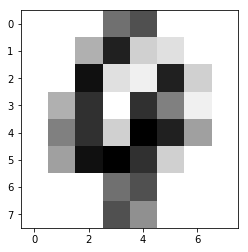

In [11]:
print(y_train[332])
plt.imshow(X_train[332].reshape(8,8), cmap='gray')


Convert labels to vectors

In [12]:
y_train = LabelBinarizer().fit_transform(y_train)
y_test = LabelBinarizer().fit_transform(y_test)

In [13]:
nn = SimpleClassifier([64, 32, 16, 10])
nn.fit(X_train, y_train, 1000, 10)

  0%|          | 2/1000 [00:00<01:20, 12.44it/s]

Epoch: 1, Loss: 647.3595971418856


  1%|          | 12/1000 [00:00<01:15, 13.05it/s]

Epoch: 10, Loss: 324.5483763950637


  2%|▏         | 22/1000 [00:01<01:14, 13.19it/s]

Epoch: 20, Loss: 76.26090831823015


  3%|▎         | 32/1000 [00:02<01:13, 13.16it/s]

Epoch: 30, Loss: 36.98925334461639


  4%|▍         | 42/1000 [00:03<01:13, 13.11it/s]

Epoch: 40, Loss: 25.181266915223194


  5%|▌         | 52/1000 [00:03<01:12, 13.08it/s]

Epoch: 50, Loss: 18.157653422186822


  6%|▌         | 62/1000 [00:04<01:11, 13.11it/s]

Epoch: 60, Loss: 13.633436835792988


  7%|▋         | 72/1000 [00:05<01:11, 13.03it/s]

Epoch: 70, Loss: 10.655420448301811


  8%|▊         | 82/1000 [00:06<01:11, 12.78it/s]

Epoch: 80, Loss: 8.700030336546725


  9%|▉         | 92/1000 [00:07<01:11, 12.78it/s]

Epoch: 90, Loss: 7.168970929485256


 10%|█         | 102/1000 [00:07<01:10, 12.82it/s]

Epoch: 100, Loss: 5.9029919777294655


 11%|█         | 112/1000 [00:08<01:08, 13.00it/s]

Epoch: 110, Loss: 5.074038052179908


 12%|█▏        | 122/1000 [00:09<01:06, 13.17it/s]

Epoch: 120, Loss: 4.52480466987205


 13%|█▎        | 132/1000 [00:10<01:05, 13.26it/s]

Epoch: 130, Loss: 4.128337716778351


 14%|█▍        | 142/1000 [00:10<01:04, 13.25it/s]

Epoch: 140, Loss: 3.8283457614643277


 15%|█▌        | 152/1000 [00:11<01:06, 12.84it/s]

Epoch: 150, Loss: 3.594745168206804


 16%|█▌        | 162/1000 [00:12<01:06, 12.69it/s]

Epoch: 160, Loss: 3.408980245921135


 17%|█▋        | 172/1000 [00:13<01:04, 12.80it/s]

Epoch: 170, Loss: 3.258621354318441


 18%|█▊        | 182/1000 [00:14<01:04, 12.77it/s]

Epoch: 180, Loss: 3.134989612774448


 19%|█▉        | 192/1000 [00:14<01:02, 12.89it/s]

Epoch: 190, Loss: 3.0318823404600677


 20%|██        | 202/1000 [00:15<01:03, 12.57it/s]

Epoch: 200, Loss: 2.9447896407090326


 21%|██        | 212/1000 [00:16<01:04, 12.14it/s]

Epoch: 210, Loss: 2.870380905635021


 22%|██▏       | 222/1000 [00:17<01:04, 12.10it/s]

Epoch: 220, Loss: 2.8061589632649024


 23%|██▎       | 232/1000 [00:18<01:00, 12.72it/s]

Epoch: 230, Loss: 2.750223780070689


 24%|██▍       | 242/1000 [00:18<00:58, 12.91it/s]

Epoch: 240, Loss: 2.7011091485417333


 25%|██▌       | 252/1000 [00:19<00:57, 12.94it/s]

Epoch: 250, Loss: 2.657668478123762


 26%|██▌       | 262/1000 [00:20<00:57, 12.76it/s]

Epoch: 260, Loss: 2.618993914049125


 27%|██▋       | 272/1000 [00:21<00:57, 12.75it/s]

Epoch: 270, Loss: 2.5843583035764555


 28%|██▊       | 282/1000 [00:21<00:56, 12.63it/s]

Epoch: 280, Loss: 2.5531730025987516


 29%|██▉       | 292/1000 [00:22<00:55, 12.76it/s]

Epoch: 290, Loss: 2.5249567986778736


 30%|███       | 302/1000 [00:23<00:54, 12.89it/s]

Epoch: 300, Loss: 2.499312733518369


 31%|███       | 312/1000 [00:24<00:53, 12.98it/s]

Epoch: 310, Loss: 2.475910609387796


 32%|███▏      | 322/1000 [00:25<00:52, 12.95it/s]

Epoch: 320, Loss: 2.4544736355478127


 33%|███▎      | 332/1000 [00:25<00:51, 13.09it/s]

Epoch: 330, Loss: 2.4347681257487155


 34%|███▍      | 342/1000 [00:26<00:50, 13.05it/s]

Epoch: 340, Loss: 2.4165954695344114


 35%|███▌      | 352/1000 [00:27<00:50, 12.95it/s]

Epoch: 350, Loss: 2.3997858160734786


 36%|███▌      | 362/1000 [00:28<00:48, 13.08it/s]

Epoch: 360, Loss: 2.384193060571854


 37%|███▋      | 372/1000 [00:28<00:49, 12.73it/s]

Epoch: 370, Loss: 2.369690830539697


 38%|███▊      | 382/1000 [00:29<00:47, 12.89it/s]

Epoch: 380, Loss: 2.356169245926487


 39%|███▉      | 392/1000 [00:30<00:48, 12.64it/s]

Epoch: 390, Loss: 2.343532282574222


 40%|████      | 402/1000 [00:31<00:47, 12.64it/s]

Epoch: 400, Loss: 2.331695608778745


 41%|████      | 412/1000 [00:32<00:45, 12.87it/s]

Epoch: 410, Loss: 2.320584794219182


 42%|████▏     | 422/1000 [00:32<00:45, 12.73it/s]

Epoch: 420, Loss: 2.310133811977283


 43%|████▎     | 432/1000 [00:33<00:43, 13.06it/s]

Epoch: 430, Loss: 2.300283769705116


 44%|████▍     | 442/1000 [00:34<00:42, 13.05it/s]

Epoch: 440, Loss: 2.290981816325952


 45%|████▌     | 452/1000 [00:35<00:42, 12.89it/s]

Epoch: 450, Loss: 2.282180176365957


 46%|████▌     | 462/1000 [00:35<00:41, 13.04it/s]

Epoch: 460, Loss: 2.2738352646471935


 47%|████▋     | 472/1000 [00:36<00:41, 12.69it/s]

Epoch: 470, Loss: 2.2659068278050314


 48%|████▊     | 482/1000 [00:37<00:39, 12.96it/s]

Epoch: 480, Loss: 2.2583570415457683


 49%|████▉     | 492/1000 [00:38<00:38, 13.11it/s]

Epoch: 490, Loss: 2.251149453889455


 50%|█████     | 502/1000 [00:38<00:37, 13.11it/s]

Epoch: 500, Loss: 2.2442475822772168


 51%|█████     | 512/1000 [00:39<00:37, 12.97it/s]

Epoch: 510, Loss: 2.237612791633609


 52%|█████▏    | 522/1000 [00:40<00:36, 13.11it/s]

Epoch: 520, Loss: 2.2312006577323253


 53%|█████▎    | 532/1000 [00:41<00:36, 12.93it/s]

Epoch: 530, Loss: 2.2249539393655566


 54%|█████▍    | 542/1000 [00:42<00:36, 12.60it/s]

Epoch: 540, Loss: 2.2187871725101838


 55%|█████▌    | 552/1000 [00:42<00:35, 12.79it/s]

Epoch: 550, Loss: 2.212547411753587


 56%|█████▌    | 562/1000 [00:43<00:33, 12.91it/s]

Epoch: 560, Loss: 2.2058914013855615


 57%|█████▋    | 572/1000 [00:44<00:33, 12.91it/s]

Epoch: 570, Loss: 2.1977546321754686


 58%|█████▊    | 582/1000 [00:45<00:32, 12.96it/s]

Epoch: 580, Loss: 2.181953522273682


 59%|█████▉    | 592/1000 [00:45<00:31, 12.94it/s]

Epoch: 590, Loss: 1.7400194425961693


 60%|██████    | 602/1000 [00:46<00:30, 13.06it/s]

Epoch: 600, Loss: 1.3523116595557578


 61%|██████    | 612/1000 [00:47<00:30, 12.91it/s]

Epoch: 610, Loss: 1.3009319658059955


 62%|██████▏   | 622/1000 [00:48<00:29, 12.77it/s]

Epoch: 620, Loss: 1.2743797568985475


 63%|██████▎   | 632/1000 [00:49<00:28, 12.98it/s]

Epoch: 630, Loss: 1.2561920970767555


 64%|██████▍   | 642/1000 [00:49<00:27, 12.90it/s]

Epoch: 640, Loss: 1.2422949534892425


 65%|██████▌   | 652/1000 [00:50<00:27, 12.72it/s]

Epoch: 650, Loss: 1.231022644350929


 66%|██████▌   | 662/1000 [00:51<00:27, 12.49it/s]

Epoch: 660, Loss: 1.2215252456236945


 67%|██████▋   | 672/1000 [00:52<00:26, 12.43it/s]

Epoch: 670, Loss: 1.2133077577441687


 68%|██████▊   | 682/1000 [00:53<00:26, 11.83it/s]

Epoch: 680, Loss: 1.2060562861290594


 69%|██████▉   | 692/1000 [00:53<00:27, 11.38it/s]

Epoch: 690, Loss: 1.1995596435970994


 70%|███████   | 702/1000 [00:54<00:25, 11.69it/s]

Epoch: 700, Loss: 1.1936693170982982


 71%|███████   | 712/1000 [00:55<00:25, 11.31it/s]

Epoch: 710, Loss: 1.1882771538565966


 72%|███████▏  | 722/1000 [00:56<00:23, 11.86it/s]

Epoch: 720, Loss: 1.1833020997850805


 73%|███████▎  | 732/1000 [00:57<00:21, 12.25it/s]

Epoch: 730, Loss: 1.1786819203807593


 74%|███████▍  | 742/1000 [00:58<00:19, 12.98it/s]

Epoch: 740, Loss: 1.1743678249183307


 75%|███████▌  | 752/1000 [00:58<00:18, 13.14it/s]

Epoch: 750, Loss: 1.1703208606564626


 76%|███████▌  | 762/1000 [00:59<00:18, 13.06it/s]

Epoch: 760, Loss: 1.1665094268686411


 77%|███████▋  | 772/1000 [01:00<00:17, 13.17it/s]

Epoch: 770, Loss: 1.1629075197611036


 78%|███████▊  | 782/1000 [01:01<00:16, 13.22it/s]

Epoch: 780, Loss: 1.1594934673433164


 79%|███████▉  | 792/1000 [01:01<00:15, 13.24it/s]

Epoch: 790, Loss: 1.1562490004770414


 80%|████████  | 802/1000 [01:02<00:14, 13.27it/s]

Epoch: 800, Loss: 1.1531585593828015


 81%|████████  | 812/1000 [01:03<00:14, 13.10it/s]

Epoch: 810, Loss: 1.1502087681111721


 82%|████████▏ | 822/1000 [01:04<00:13, 13.13it/s]

Epoch: 820, Loss: 1.1473880308272368


 83%|████████▎ | 832/1000 [01:04<00:12, 13.13it/s]

Epoch: 830, Loss: 1.1446862177709551


 84%|████████▍ | 842/1000 [01:05<00:11, 13.19it/s]

Epoch: 840, Loss: 1.1420944181444352


 85%|████████▌ | 852/1000 [01:06<00:11, 13.04it/s]

Epoch: 850, Loss: 1.139604743580258


 86%|████████▌ | 862/1000 [01:07<00:10, 13.17it/s]

Epoch: 860, Loss: 1.137210170283887


 87%|████████▋ | 872/1000 [01:07<00:09, 13.15it/s]

Epoch: 870, Loss: 1.1349044110666366


 88%|████████▊ | 882/1000 [01:08<00:08, 13.29it/s]

Epoch: 880, Loss: 1.132681810713672


 89%|████████▉ | 892/1000 [01:09<00:08, 12.93it/s]

Epoch: 890, Loss: 1.1305372597410162


 90%|█████████ | 902/1000 [01:10<00:07, 12.88it/s]

Epoch: 900, Loss: 1.1284661227719406


 91%|█████████ | 912/1000 [01:10<00:06, 13.06it/s]

Epoch: 910, Loss: 1.1264641786322818


 92%|█████████▏| 922/1000 [01:11<00:05, 13.14it/s]

Epoch: 920, Loss: 1.1245275699131407


 93%|█████████▎| 932/1000 [01:12<00:05, 13.12it/s]

Epoch: 930, Loss: 1.1226527602383223


 94%|█████████▍| 942/1000 [01:13<00:04, 13.13it/s]

Epoch: 940, Loss: 1.1208364978457772


 95%|█████████▌| 952/1000 [01:14<00:03, 13.12it/s]

Epoch: 950, Loss: 1.1190757843773889


 96%|█████████▌| 962/1000 [01:14<00:02, 13.06it/s]

Epoch: 960, Loss: 1.1173678479919198


 97%|█████████▋| 972/1000 [01:15<00:02, 13.15it/s]

Epoch: 970, Loss: 1.1157101200875843


 98%|█████████▊| 982/1000 [01:16<00:01, 13.17it/s]

Epoch: 980, Loss: 1.114100215055466


 99%|█████████▉| 992/1000 [01:17<00:00, 12.90it/s]

Epoch: 990, Loss: 1.1125359125913339


100%|██████████| 1000/1000 [01:17<00:00, 13.11it/s]

Epoch: 1000, Loss: 1.1110151421780676


In [14]:
predictions = nn.predict(X_test)

In [15]:
predictions

array([[3.16528028e-09, 9.98646179e-01, 2.93200150e-04, ...,
        6.30050572e-05, 5.45414073e-04, 5.36154989e-06],
       [1.14926069e-03, 2.36283969e-06, 1.56221176e-09, ...,
        2.13840202e-04, 2.82713694e-03, 4.76942760e-05],
       [2.02407335e-07, 2.98639713e-05, 3.39443150e-03, ...,
        1.52370094e-04, 1.81669222e-04, 3.64573469e-05],
       ...,
       [2.21199860e-05, 9.62112718e-04, 2.79800856e-04, ...,
        6.89672217e-07, 9.99337965e-01, 2.41907397e-03],
       [1.94277350e-05, 1.61323069e-03, 1.44939406e-06, ...,
        2.37018013e-03, 1.47505644e-08, 8.92098942e-07],
       [9.98025880e-01, 4.80462711e-11, 2.18694773e-03, ...,
        1.88511879e-04, 2.31971370e-05, 1.66518394e-04]])

In [16]:
predictions[9].argmax()

4

In [17]:
y_test[9][2]

0

In [18]:
true_counter = 0
false_counter = 0
for i in range(len(y_test)):
    if y_test[i][predictions[i].argmax()] == 1:
        true_counter += 1
    else:
        false_counter += 1
        
print(100 * true_counter / len(y_test))

96.94444444444444


# MNIST Keras

In [19]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [20]:
dataset = datasets.fetch_mldata('MNIST Original')

/home/yurii/Work/study/tf/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/yurii/Work/study/tf/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


Normalize the data

In [21]:
data = dataset.data.astype('float') / 255

Split training / test data

In [22]:
X_train, x_test, y_train, y_test = train_test_split(data, dataset.target, test_size=0.2)

show image & label

4.0

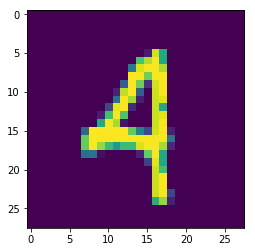

In [23]:

plt.imshow(X_train[0].reshape(np.sqrt(X_train[0].shape[0]).astype('int'),np.sqrt(X_train[0].shape[0]).astype('int')))
y_train[0]


In [24]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [25]:
y_train[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

### Build the model

    784 -> 256 -> 128 ->  10

In [26]:
model = Sequential()
# First fully-connected layer
model.add(Dense(256, input_shape=X_train[-1].shape, activation='relu'))
# Second fully-connected layer
model.add(Dense(128, activation='relu'))
# Output layer. Use softmax activation to get normalized probabilities of obtaining to the one of the classes
model.add(Dense(10, activation='softmax'))

In [27]:
learning_rate = 0.01
epochs = 100
stoch_grad_desc = SGD(learning_rate)


In [28]:
model.compile(loss='categorical_crossentropy', optimizer=stoch_grad_desc, metrics=['accuracy'])

   ### Training

In [29]:
H = model.fit(X_train, y_train, validation_data=(X_train, y_train), epochs=epochs, batch_size=128)

Train on 56000 samples, validate on 56000 samples
Epoch 1/100
56000/56000 [==============================] - 2s 31us/step - loss: 1.1855 - acc: 0.7175 - val_loss: 0.5985 - val_acc: 0.8535
Epoch 2/100
56000/56000 [==============================] - 1s 18us/step - loss: 0.4856 - acc: 0.8734 - val_loss: 0.4127 - val_acc: 0.8888
Epoch 3/100
56000/56000 [==============================] - 1s 18us/step - loss: 0.3799 - acc: 0.8963 - val_loss: 0.3505 - val_acc: 0.9035
Epoch 4/100
56000/56000 [==============================] - 1s 18us/step - loss: 0.3341 - acc: 0.9064 - val_loss: 0.3162 - val_acc: 0.9117
Epoch 5/100
56000/56000 [==============================] - 1s 24us/step - loss: 0.3056 - acc: 0.9145 - val_loss: 0.2920 - val_acc: 0.9176
Epoch 6/100
56000/56000 [==============================] - 1s 20us/step - loss: 0.2854 - acc: 0.9193 - val_loss: 0.2764 - val_acc: 0.9211
Epoch 7/100
56000/56000 [==============================] - 1s 19us/step - loss: 0.2689 - acc: 0.9241 - val_loss: 0.2605 - 

56000/56000 [==============================] - 1s 20us/step - loss: 0.0673 - acc: 0.9819 - val_loss: 0.0653 - val_acc: 0.9826
Epoch 60/100
56000/56000 [==============================] - 1s 19us/step - loss: 0.0661 - acc: 0.9820 - val_loss: 0.0639 - val_acc: 0.9830
Epoch 61/100
56000/56000 [==============================] - 1s 19us/step - loss: 0.0649 - acc: 0.9829 - val_loss: 0.0631 - val_acc: 0.9835
Epoch 62/100
56000/56000 [==============================] - 1s 22us/step - loss: 0.0636 - acc: 0.9830 - val_loss: 0.0625 - val_acc: 0.9835
Epoch 63/100
56000/56000 [==============================] - 1s 23us/step - loss: 0.0626 - acc: 0.9833 - val_loss: 0.0610 - val_acc: 0.9840
Epoch 64/100
56000/56000 [==============================] - 1s 19us/step - loss: 0.0615 - acc: 0.9839 - val_loss: 0.0597 - val_acc: 0.9844
Epoch 65/100
56000/56000 [==============================] - 1s 20us/step - loss: 0.0605 - acc: 0.9841 - val_loss: 0.0586 - val_acc: 0.9848
Epoch 66/100
56000/56000 [==============

In [30]:
predicted = model.predict(x_test, batch_size=128)

In [31]:
print(classification_report(y_test.argmax(axis=1), predicted.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1363
           1       0.98      0.98      0.98      1613
           2       0.97      0.98      0.97      1434
           3       0.97      0.97      0.97      1374
           4       0.98      0.98      0.98      1389
           5       0.97      0.96      0.97      1240
           6       0.98      0.98      0.98      1356
           7       0.97      0.97      0.97      1487
           8       0.97      0.97      0.97      1366
           9       0.97      0.97      0.97      1378

   micro avg       0.98      0.98      0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



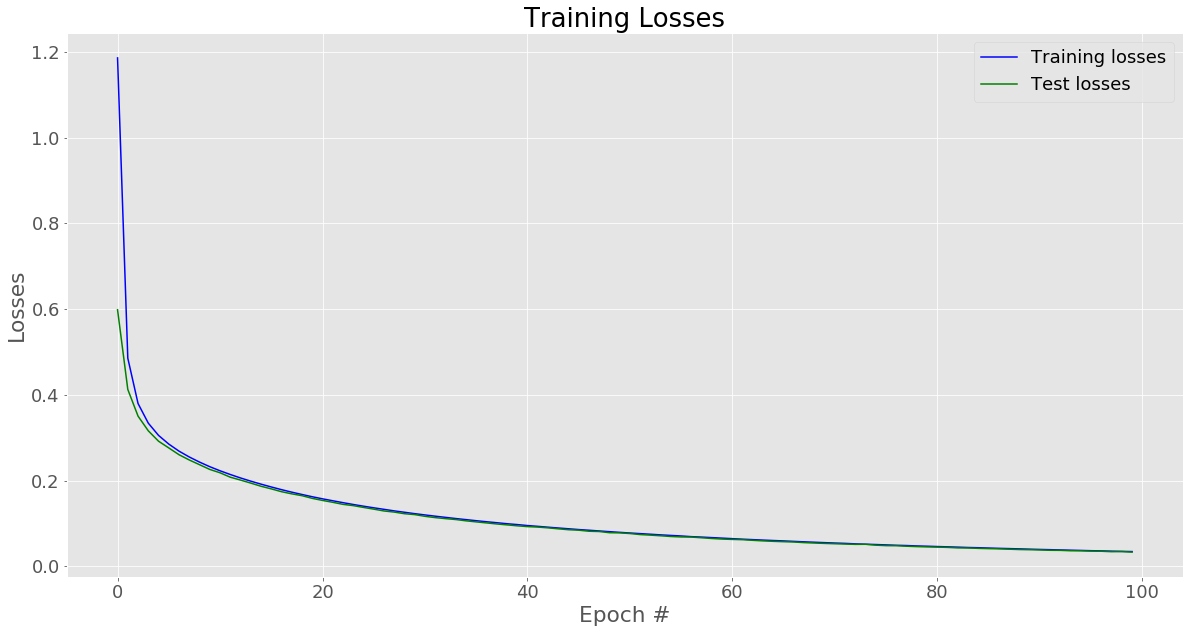

In [32]:
plt.style.use("ggplot")
plt.figure(figsize=(20,10))

plt.rcParams.update({'font.size': 18})

plt.plot(np.arange(0, epochs), H.history["loss"], label="Training losses", c="b")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="Test losses", c='g')

plt.title("Training Losses")
plt.xlabel("Epoch #")
plt.ylabel("Losses")
plt.legend()
plt.show()

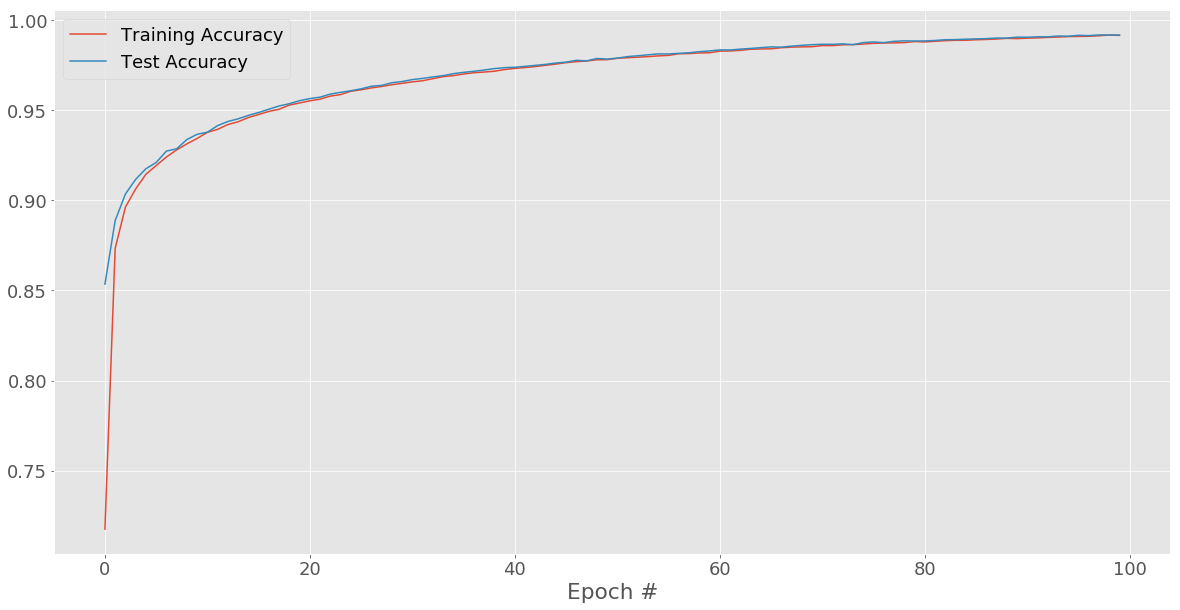

In [33]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(0, epochs), H.history["acc"], label="Training Accuracy")
plt.plot(np.arange(0, epochs), H.history["val_acc"], label="Test Accuracy")
plt.legend()
plt.xlabel("Epoch #")
plt.show()

# CIFAR - 10

In [34]:
from keras.datasets import cifar10

In [35]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [36]:
# Normalize data
X_train = X_train.astype("float") / 255
X_test = X_test.astype("float") / 255
# 
X_train = X_train.reshape((X_train.shape[0], 3072))
X_test = X_test.reshape((X_test.shape[0], 3072))

In [37]:
y_train = LabelBinarizer().fit_transform(y_train)
y_test = LabelBinarizer().fit_transform(y_test)

label_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

            Build the model of shape: 3072 ---> 1024 ---> 512 ---> 10

In [38]:
model = Sequential()
# add first fully-connected layer
model.add(Dense(1024, input_shape=X_train[3].shape, activation="relu"))
# add second fully-connected hidden layer
model.add(Dense(512, activation="relu"))
# add output layer
model.add(Dense(10, activation="softmax"))

In [39]:
learning_rate = 0.01
epochs = 100
batch_size = 32
grad_desc = SGD(learning_rate)

In [40]:
model.compile(loss='categorical_crossentropy', optimizer=grad_desc, metrics=['accuracy'])

            DO! THE! TRAINING!!!!!!!!!!!!!!!!!!!!!

In [41]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = epochs, batch_size = batch_size)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 114us/step - loss: 1.8425 - acc: 0.3411 - val_loss: 1.7208 - val_acc: 0.3878
Epoch 2/100
50000/50000 [==============================] - 5s 105us/step - loss: 1.6552 - acc: 0.4146 - val_loss: 1.6122 - val_acc: 0.4278
Epoch 3/100
50000/50000 [==============================] - 5s 109us/step - loss: 1.5720 - acc: 0.4477 - val_loss: 1.6086 - val_acc: 0.4306
Epoch 4/100
50000/50000 [==============================] - 5s 109us/step - loss: 1.5118 - acc: 0.4652 - val_loss: 1.5141 - val_acc: 0.4569
Epoch 5/100
50000/50000 [==============================] - 5s 106us/step - loss: 1.4641 - acc: 0.4840 - val_loss: 1.4659 - val_acc: 0.4797
Epoch 6/100
50000/50000 [==============================] - 5s 110us/step - loss: 1.4218 - acc: 0.4994 - val_loss: 1.4810 - val_acc: 0.4642
Epoch 7/100
50000/50000 [==============================] - 5s 107us/step - loss: 1.3852 - acc: 0.5104 - val_loss: 1.

KeyboardInterrupt: 

In [42]:
y_pred = model.predict(X_test, batch_size=batch_size)

In [43]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=label_names))

              precision    recall  f1-score   support

    airplane       0.65      0.50      0.56      1000
  automobile       0.47      0.84      0.60      1000
        bird       0.46      0.37      0.41      1000
         cat       0.47      0.19      0.27      1000
        deer       0.55      0.31      0.39      1000
         dog       0.52      0.38      0.43      1000
        frog       0.52      0.70      0.60      1000
       horse       0.51      0.70      0.59      1000
        ship       0.57      0.72      0.64      1000
       truck       0.53      0.50      0.52      1000

   micro avg       0.52      0.52      0.52     10000
   macro avg       0.52      0.52      0.50     10000
weighted avg       0.52      0.52      0.50     10000



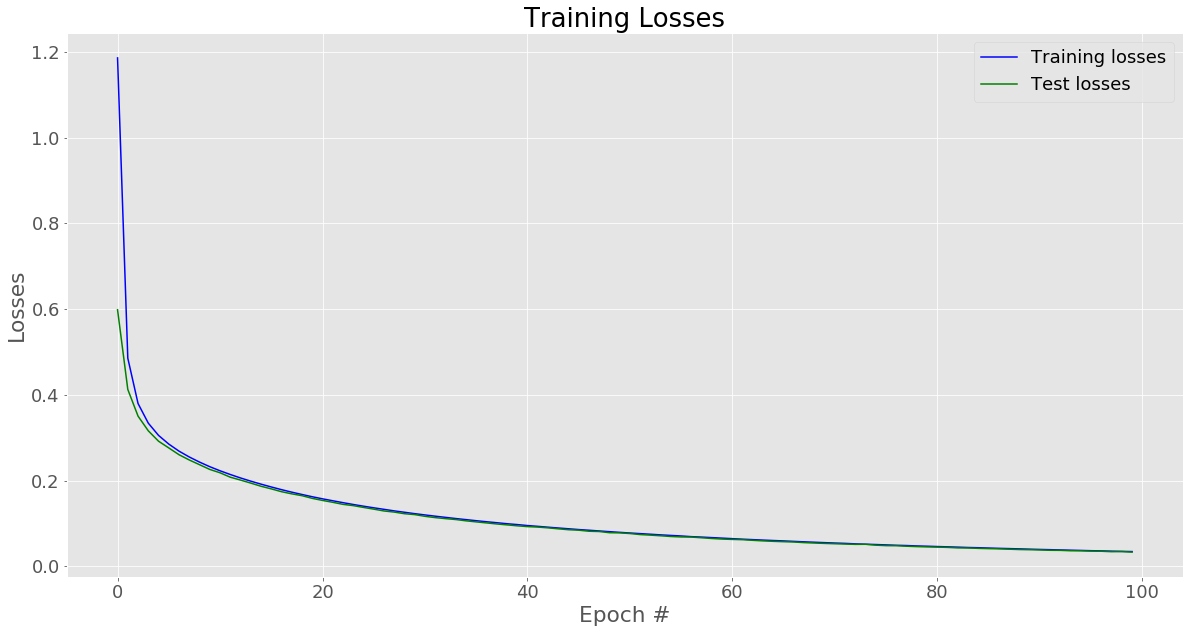

In [45]:
plt.style.use("ggplot")
plt.figure(figsize=(20,10))

plt.rcParams.update({'font.size': 18})

plt.plot(np.arange(0, epochs), H.history["loss"], label="Training losses", c="b")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="Test losses", c='g')

plt.title("Training Losses")
plt.xlabel("Epoch #")
plt.ylabel("Losses")
plt.legend()
plt.show()

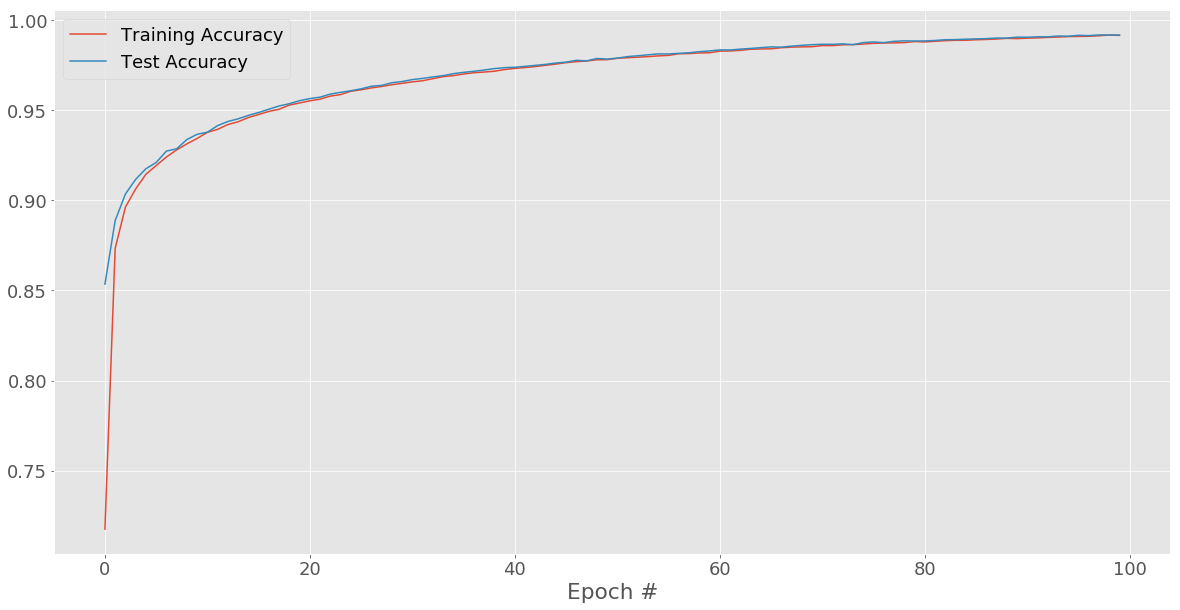

In [46]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(0, epochs), H.history["acc"], label="Training Accuracy")
plt.plot(np.arange(0, epochs), H.history["val_acc"], label="Test Accuracy")
plt.legend()
plt.xlabel("Epoch #")
plt.show()